# HPGe Simulation

Importing libraries and initialising global constants

In [11]:
import openmc
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
#taken from europium gamma decay spectrum, all decay channels with an intensity >0.01%
europium_energy_peaks_ev = [121781.7, 125690, 148010, 212568, 244697.4, 251633, 271131, 275449, 285980, 295938.7, 315174, 324830, 329425, 340400,
                           344278.5, 351660, 367789.1, 411116.5, 416048, 440860, 443965, 482310, 488679.2, 493508, 503474, 511000, 520227, 523130,
                           526881, 534245, 556560, 562930, 563990, 566442, 586265, 656489, 664780, 671155, 674675, 674677, 678623, 686610, 688670,
                           712843, 719349, 727990, 764900, 768944, 778904.5, 794810, 810451, 839360, 841574, 867380, 896580, 901181, 906010, 919337,
                           926317, 930580, 958630, 963390, 964079, 974090, 990190, 1005272, 1084000, 1085337, 1089737, 1109174, 1112076, 1170930,
                           1206110, 1212948, 1249938, 1261343, 1292778, 1299142, 1348100, 1363770, 1408013, 1457643, 1528103]

europium_decay_probabilities_percent = [28.41, 0.019, 0.035, 0.0196, 7.55, 0.0671, 0.078, 0.0323, 0.01, 0.442, 0.0496, 0.0738, 0.129, 0.031, 26.59,
                                        0.014, 0.862, 2.238, 0.109, 0.0133, 0.32, 2.8, 0.0279, 0.4139, 0.0278, 0.1533, 0.054, 0.0536, 0.0113, 0.0129, 
                                        0.0368, 0.0177, 0.038, 0.457, 0.131, 0.462,  0.1437, 0.01, 0.0194, 0.17, 0.0171, 0.47, 0.02, 0.841, 0.0961,
                                        0.268, 0.0106, 0.19, 0.088, 12.97, 0.0263, 0.317, 0.016, 4.243, 0.0669, 0.084, 0.016, 0.429, 0.273, 0.0729,
                                        0.021, 0.1341, 14.5, 0.0138, 0.0315, 0.665, 0.244, 10.13, 1.73, 0.186, 13.41, 0.0365, 0.0135, 1.416, 0.186,
                                        0.0336, 0.104, 1.633, 0.0175, 0.0256, 20.85, 0.498, 0.281]

prob_total = 0
for prob in europium_decay_probabilities_percent:
    prob_total += prob

europium_decay_probabilities_percent = np.array(europium_decay_probabilities_percent)
normalised_europium_decay_probabilities = europium_decay_probabilities_percent / (prob_total)
normalised_europium_decay_probabilities = normalised_europium_decay_probabilities.tolist()

Creating settings

In [3]:
#materials
aluminium_mat = openmc.Material()
aluminium_mat.add_element('Al', 1, percent_type = 'ao')
aluminium_mat.set_density('g/cm3', 2.6989)

beryllium_mat = openmc.Material()
beryllium_mat.add_element('Be', 1, percent_type = 'ao')
beryllium_mat.set_density('g/cm3', 1.848)

copper_mat = openmc.Material()
copper_mat.add_element('Cu', 1, percent_type = 'ao')
copper_mat.set_density('g/cm3', 8.96)

germanium_mat = openmc.Material()
germanium_mat.add_element('Ge', 1, percent_type = 'ao')
germanium_mat.set_density('g/cm3', 5.323)

lead_mat = openmc.Material()
lead_mat.add_element('Pb', 1, percent_type = 'ao')
lead_mat.set_density('g/cm3', 11.35)

mylar_mat = openmc.Material()
mylar_mat.add_element('C', 10, percent_type = 'ao')
mylar_mat.add_element('H', 8, percent_type = 'ao')
mylar_mat.add_element('O', 4, percent_type = 'ao')
mylar_mat.set_density('g/cm3', 1.38)

vacuum_mat = openmc.Material()#setting a vacuum material as air with a near-zero density
vacuum_mat.add_element('C', 0.00015, percent_type = 'ao')
vacuum_mat.add_element('N', 0.784429, percent_type = 'ao')
vacuum_mat.add_element('O', 0.210750, percent_type = 'ao')
vacuum_mat.add_element('Ar', 0.004671, percent_type = 'ao')
vacuum_mat.set_density('g/cm3', 0.001)


materials = openmc.Materials([aluminium_mat, beryllium_mat, copper_mat, germanium_mat, lead_mat, mylar_mat, vacuum_mat])
materials.export_to_xml()

In [4]:
#surfaces

lead_shield_out = openmc.model.RightCircularCylinder([0, 0, -28], 61, 28.5, axis = 'z', boundary_type = 'vacuum')
lead_shield_in = openmc.model.RightCircularCylinder([0, 0, -23], 46, 12.5, axis = 'z', boundary_type = 'vacuum')

outer_cylinder_out = openmc.model.RightCircularCylinder([0, 0, -23], 23, 10, axis = 'z')
outer_cylinder_in = openmc.model.RightCircularCylinder([0, 0, -23], 22.9, 9.9, axis = 'z')

aluminium_case_out = openmc.model.RightCircularCylinder([0, 0, -11], 10.494, 9, axis = 'z')
aluminium_case_in = openmc.model.RightCircularCylinder([0, 0, -10.7], 10.2, 8.92, axis = 'z')

aluminium_layer = openmc.model.RightCircularCylinder([0, 0, -0.506], 0.003, 9, axis = 'z')
mylar_layer = openmc.model.RightCircularCylinder([0, 0, -0.503], 0.003, 9, axis = 'z')

germanium_crystal = openmc.model.RightCircularCylinder([0, 0, -5.543], 5.03, 7.07, axis = 'z')
germanium_crystal.id = 1

interior_hole_cylinder = openmc.model.RightCircularCylinder((0, 0, -46), 43.704, 0.44, axis = 'z')
interior_hole_sphere = openmc.Sphere(0, 0, -2.356, 0.44)

Rounded Hole Region: ((-28 29 -30) | -31)
Lead Shield Region: (-1 2 -3 (4 | -5 | 6))
Outer Cylinder Region: (-7 8 -9 (10 | -11 | 12) ~((-28 29 -30) | -31))
Aluminium Case Region: (-13 14 -15 (16 | -17 | 18) ~((-28 29 -30) | -31))
Aluminium Layer Region: (-19 20 -21)
Mylar Layer Region: (-22 23 -24)
Germanium Crystal Region: (-25 26 -27 ~((-28 29 -30) | -31))
Vacuum Region: (-4 5 -6 ~(-7 8 -9 (10 | -11 | 12) ~((-28 29 -30) | -31)) ~(-13 14 -15 (16 | -17 | 18) ~((-28 29 -30) | -31)) ~(-19 20 -21) ~(-22 23 -24) ~(-25 26 -27 ~((-28 29 -30) | -31)))


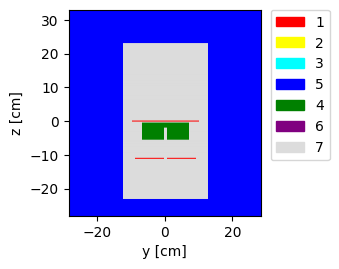

In [5]:
colour_assignment = {aluminium_mat: 'red', beryllium_mat: 'yellow', copper_mat: 'cyan', lead_mat: 'blue', germanium_mat: 'green', mylar_mat: 'purple',
                    vacuum_mat: 'gainsboro'}

rounded_hole_region = -interior_hole_cylinder | -interior_hole_sphere
print(f"Rounded Hole Region: {rounded_hole_region}")

lead_shield_region = -lead_shield_out & +lead_shield_in
print(f"Lead Shield Region: {lead_shield_region}")
lead_shield_cell = openmc.Cell(region = lead_shield_region)
lead_shield_cell.fill = lead_mat

outer_cylinder_region = -outer_cylinder_out & +outer_cylinder_in & ~rounded_hole_region
print(f"Outer Cylinder Region: {outer_cylinder_region}")
outer_cylinder_cell = openmc.Cell(region = outer_cylinder_region)
outer_cylinder_cell.fill = aluminium_mat

aluminium_case_region = -aluminium_case_out & +aluminium_case_in & ~rounded_hole_region
print(f"Aluminium Case Region: {aluminium_case_region}")
aluminium_case_cell = openmc.Cell(region = aluminium_case_region)
aluminium_case_cell.fill = aluminium_mat

aluminium_layer_region = -aluminium_layer
print(f"Aluminium Layer Region: {aluminium_layer_region}")
aluminium_layer_cell = openmc.Cell(region = aluminium_layer_region)
aluminium_layer_cell.fill = aluminium_mat

mylar_layer_region = -mylar_layer
print(f"Mylar Layer Region: {mylar_layer_region}")
mylar_layer_cell = openmc.Cell(region = mylar_layer_region)
mylar_layer_cell.fill = mylar_mat

germanium_crystal_region = -germanium_crystal & ~rounded_hole_region
print(f"Germanium Crystal Region: {germanium_crystal_region}")
germanium_crystal_cell = openmc.Cell(region = germanium_crystal_region)
germanium_crystal_cell.fill = germanium_mat

vacuum_region = -lead_shield_in & ~outer_cylinder_region & ~aluminium_case_region & ~aluminium_layer_region & ~mylar_layer_region & ~germanium_crystal_region
print(f"Vacuum Region: {vacuum_region}")
vacuum_cell = openmc.Cell(region=vacuum_region)
vacuum_cell.fill = vacuum_mat

geometry = openmc.Geometry([lead_shield_cell, outer_cylinder_cell, aluminium_case_cell, germanium_crystal_cell, aluminium_layer_cell, 
                            mylar_layer_cell, vacuum_cell])

plot = geometry.plot(basis = 'yz', color_by = 'material', colors = colour_assignment, legend = True)

geometry.export_to_xml()


In [6]:
settings = openmc.Settings()
settings.batches = 100
settings.particles = 1000000
settings.run_mode = 'fixed source'

source = openmc.IndependentSource()
source.space = openmc.stats.Point((0,0,0.5))
source.particle = 'photon'
source.angle = openmc.stats.Isotropic()
energy_distribution = openmc.stats.Discrete(europium_energy_peaks_ev, normalised_europium_decay_probabilities)
source.energy = energy_distribution
settings.source = source

In [70]:
# mesh = openmc.RegularMesh().from_domain(geometry)
# mesh.dimension = (500, 500, 500)
# mesh.filter = openmc.MeshFilter(mesh, filter_id = 1)

energy_bins = np.linspace(europium_energy_peaks_ev[0]-10000, europium_energy_peaks_ev[-1]+10000, num = 10000)
energy_filter = openmc.EnergyFilter(energy_bins)

cell_filter = openmc.CellFilter(germanium_crystal_cell)
particle_filter = openmc.ParticleFilter('photon')

tally = openmc.Tally(name = 'pulse_height')
tally.filters = [cell_filter, energy_filter, particle_filter]
tally.scores = ['current']
tallies = openmc.Tallies()
tallies.append(tally)
tallies.export_to_xml()

In [71]:
model = openmc.model.Model(geometry, materials, settings, tallies)

!rm *.h5
results_filename = model.run(mpi_args=['mpiexec', '-n', '4'], threads=4)
results = openmc.StatePoint(results_filename)
current = results.get_tally(name = 'pulse_height')

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

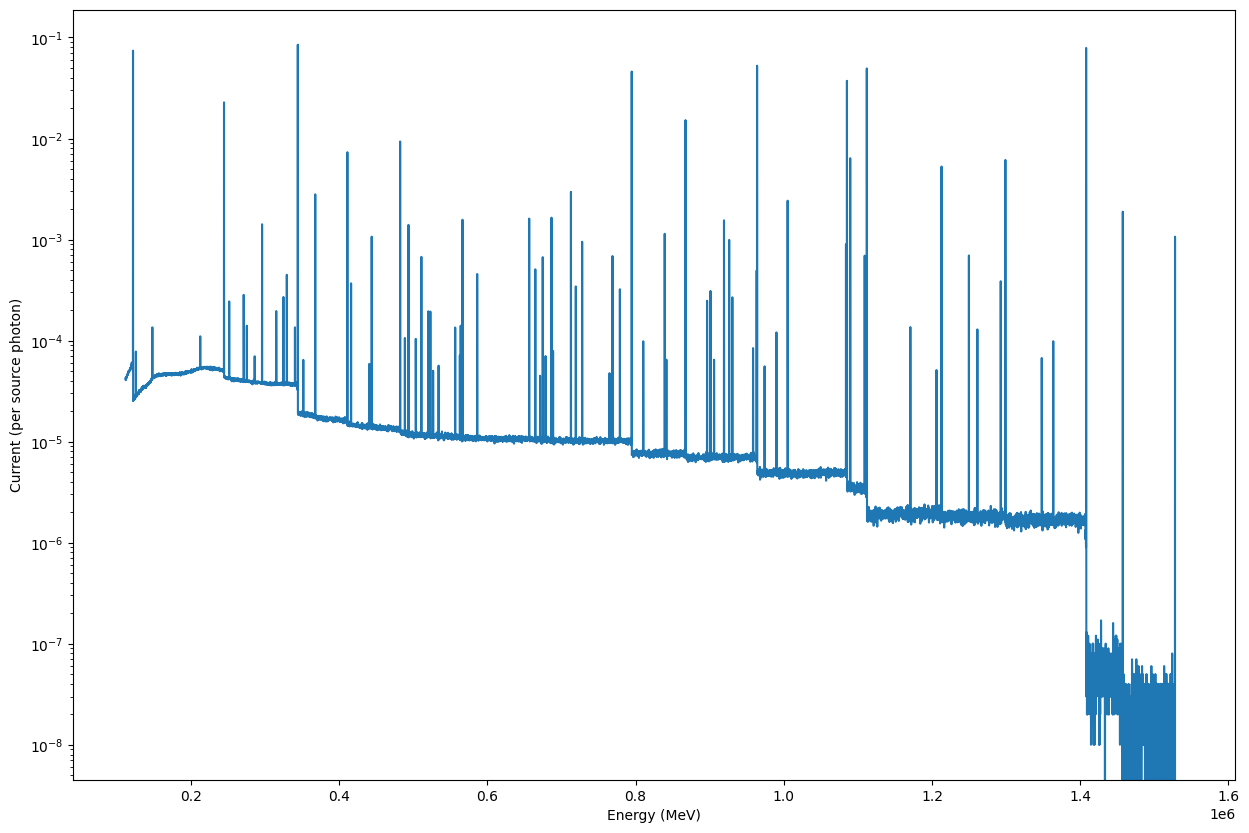

In [72]:
fig = plt.figure(figsize = [15, 10])

graph = current.mean.flatten()
plt.plot(energy_bins[:-1], graph)
plt.yscale('log')

plt.xlabel('Energy (MeV)')
plt.ylabel('Current (per source photon)')

plt.show()

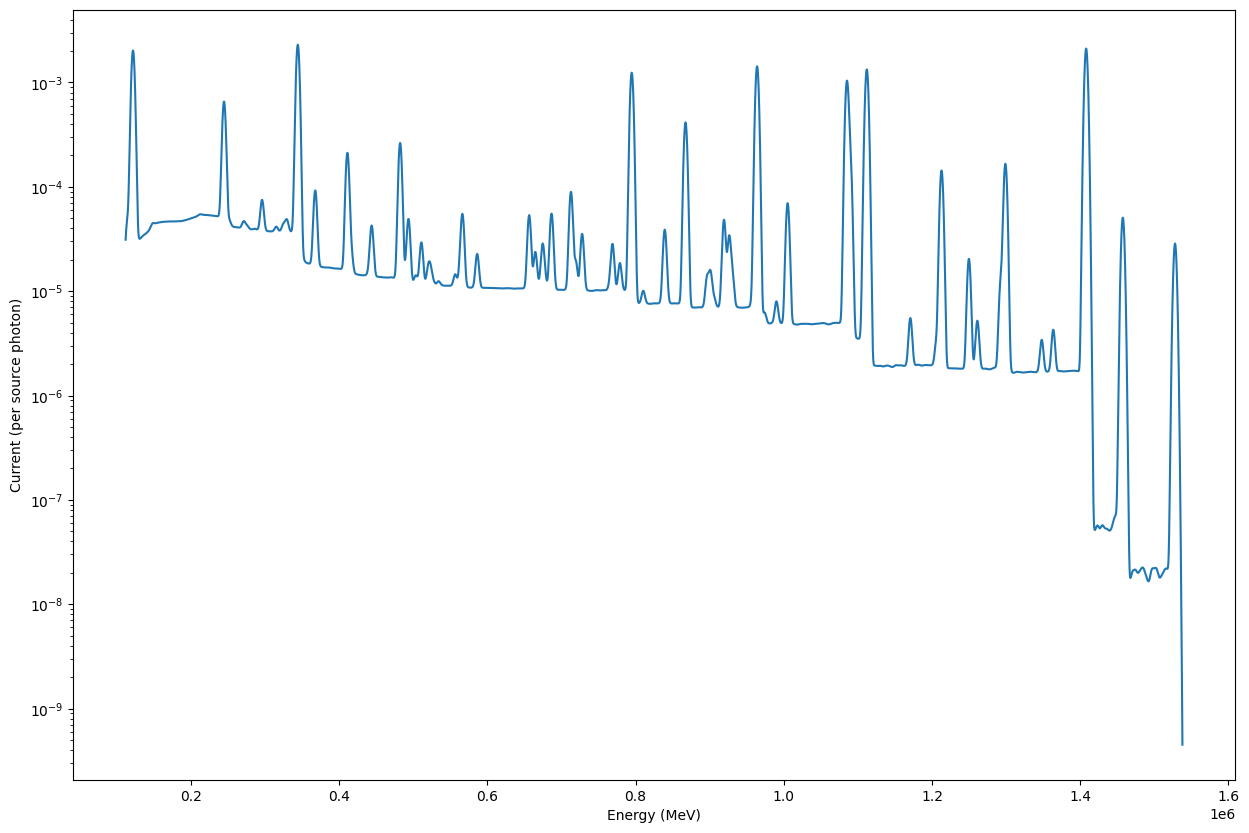

In [73]:
#applying gaussian broadening
def apply_gaussian_broadening(energy_bins, spectrum, fwhm):
    std = fwhm / (2 * np.sqrt(2 * np.log(2)))

    broadened_spectrum = np.zeros_like(spectrum)

    for i in range(len(spectrum)):
        gaussian = np.exp(-0.5 * ((energy_bins - energy_bins[i]) / std) ** 2)
        gaussian /= gaussian.sum()
        broadened_spectrum += spectrum[i] * gaussian

    return broadened_spectrum

broadened_graph = apply_gaussian_broadening(energy_bins[:-1], graph, 5000)

fig = plt.figure(figsize=[15, 10])
plt.plot(energy_bins[:-1], broadened_graph)
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Current (per source photon)')
plt.show()

71
[121766.94762476247, 125618.400280028, 147871.2378437844, 212490.05461546156, 244585.4934093409, 251575.1667466747, 271117.7228122812, 275397.11465146515, 295938.19547954795, 315052.81236123614, 324752.76719671965, 329317.45182518254, 340301.2242124212, 344152.6768676868, 367689.3319831983, 411053.83595359535, 416046.45976597664, 443862.50672067207, 482234.3868786879, 488653.47463746375, 493503.45205520553, 503346.05328532855, 510906.31220122013, 520178.3278527853, 523031.2557455746, 556553.1584858486, 563970.7710071007, 566395.7597159715, 586223.6085708571, 656405.6347334733, 664679.1256225622, 674664.3732473247, 678515.8259025902, 686504.0240024002, 688643.7199219922, 712750.9606160616, 719312.6947694769, 727871.4784478447, 768810.993709371, 778796.2413341334, 794772.6375337533, 810321.0945494549, 839278.3126612661, 841560.6549754975, 867379.6524052405, 896479.5169116912, 901044.2015401539, 905894.1789578957, 919302.9400540054, 926292.6133913391, 930572.0052305231, 958530.69857985

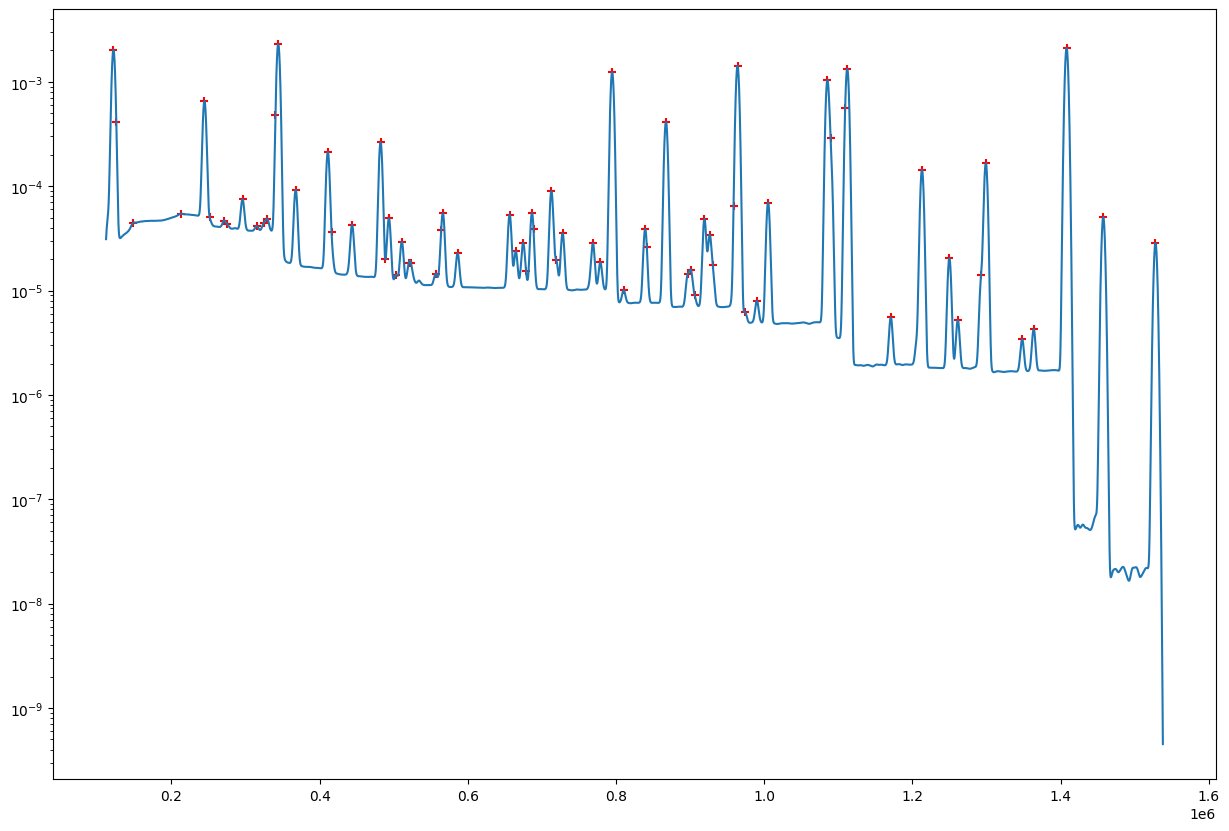

In [75]:
#finding peaks

def find_energy_peaks(energy_bins, spectrum):
    peak_locations = list(scipy.signal.find_peaks(graph, height = 0.00001, distance = 10, prominence = 0.00005, width = 0.01))[0]
    peaks = []
    current = []
    
    for location in peak_locations:
        peaks.append(float(energy_bins[location]))
        current.append(float(spectrum[location]))
    
    return peaks, current

broadened_peaks, broadened_current = find_energy_peaks(energy_bins[:-1], broadened_graph)
print(len(broadened_peaks))
print(broadened_peaks)

fig = plt.figure(figsize=[15, 10])
plt.plot(energy_bins[:-1], broadened_graph)
plt.scatter(broadened_peaks, broadened_current, marker = '+', color = 'red')
plt.yscale('log')
plt.show()